
# CUSTOMER CHURN ANALYSIS FOR A TELECOMMUNICATIONS COMPANY #


# 📊 BUSINESS UNDERSTANDING

# Objectives

When customers leave or cancel a service, it causes major issues in the telecoms industry which is typically known as *Customer Churn*. 

High churn not only results in lost revenue but also increases the cost of acquiring and onboarding new customers. Retaining existing customers is typically far more cost-effective than constantly seeking replacements.

The telecom company in focus is experiencing revenue losses due to a considerable number of customers leaving their services prematurely. To mitigate this issue, there is a strong business need to better understand the behavioral and service-related patterns that lead to customer churn.


# Key Business Question
**"Are there any predictable patterns in customer churn?"**

By identifying such patterns, the company can:
- Develop targeted retention strategies,
- Intervene proactively before a customer decides to leave,
- Optimize customer service and pricing plans,
- Allocate marketing resources more effectively.

The ultimate goal is to support the business in making **data-driven decisions** that will reduce churn, retain high-value customers, and minimize revenue leakage.

This analysis is designed to provide insights in a clear and actionable format for business stakeholders, including the strategy, marketing, and customer service teams.


# 🧾 Data Understanding

## Data Understanding

This project uses the `bigml_59c28831336c6604c800002a.csv` file, which contains historical data about SyriaTel’s customers. The purpose of this analysis is to explore the characteristics and behaviors of customers who have left (churned) and those who have stayed, in order to identify patterns that may help prevent future churn.

Each row in the dataset represents a unique customer, and each column provides specific information about their demographics, service usage, and interaction with the company.

### 🔑 Key Features in the Dataset:

- **State**: U.S. state where the customer is located (not Syria-specific, but used for modeling purposes).
- **Account Length**: The number of days the customer has been with the company.
- **Area Code**: Telephone area code of the customer.
- **Phone**: Unique customer phone number (not useful for prediction).
- **International Plan**: Whether the customer has an international calling plan (`yes` or `no`).
- **Voice Mail Plan**: Whether the customer has a voicemail plan.
- **Voice Mail Message**: Number of voicemail messages (if applicable).
- **Total Day Mins / Calls / Charge**: Usage metrics for daytime calls.
- **Total Evening Mins / Calls / Charge**: Usage metrics for evening calls.
- **Total Night Mins / Calls / Charge**: Usage metrics for night calls.
- **Total International Mins / Calls / Charge**: International call usage and cost.
- **Customer Service Calls**: Number of times the customer has contacted customer service.
- **Churn**: The **target variable**, indicating whether the customer has churned (`True`) or stayed (`False`).

### 🧠 Target Variable:

- **Churn**: This is the variable we want to predict. It is a **binary classification** problem:
  - `True`: The customer has churned (left the company).
  - `False`: The customer is still active.

### 📝 Initial Observations:

- Many features are **numerical** (e.g., minutes, charges, calls), while some are **categorical** (e.g., International Plan, Voice Mail Plan).
- Features like `phone number` and `state` may not provide useful predictive power and could be dropped or treated accordingly.
- Variables such as **number of customer service calls**, **international plan**, or **high daily call charges** may indicate higher churn risk.

Understanding the dataset’s structure is critical for selecting relevant features and preparing the data for modeling.


# 🧹 Data Preparation

Before building any predictive model, it’s crucial to clean and prepare the dataset. This involves handling missing values, converting categorical variables to numerical formats, and removing irrelevant columns.

### Steps we'll follow:

1. **Remove or transform irrelevant columns:**  
   Columns like `phone number` and `state` likely don't help prediction and can be dropped.

2. **Handle categorical variables:**  
   Features such as `International Plan` and `Voice Mail Plan` need to be converted from text (`yes`/`no`) into binary numeric values (0/1).

3. **Check for missing or inconsistent values:**  
   Make sure the dataset is clean.

4. **Split the dataset into features (`X`) and target (`y`).**



# 📥 Data Loading and Cleaning

## Data Loading

In this section, we will load the SyriaTel customer churn dataset, inspect its structure, and clean it by handling irrelevant columns, converting categorical variables, and checking for missing values.


### Step 1: Load the dataset and preview it

In [28]:
import pandas as pd

#Load the dataset

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [29]:
#Preview the data

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
#Get basic info about data types and non - null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning
 
We will remove columns that are unlikely to predict churn:

- *State* :  Customer's state (location)
- *Phone number* : Unique customer identifier, not predictive

In [31]:
print(df.columns.tolist())

['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [32]:
#Drop 'state' and 'phone number' columns

df.drop(['state','phone number'], axis=1, inplace=True)

print('\n Columns after dropping irrelevant ones:')
print (df.columns)


 Columns after dropping irrelevant ones:
Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')


## *Converting categorical columns to numeric*

That is converting *International plan* and *Voice mail plan* from "yes"/"no" strings to binary 0/1 values for model compatibility.

In [33]:
# Map yes/no to 0/1 for categorical variables
df['international plan'] = df ['international plan'].map({'yes': 1, 'no' : 0})
df['voice mail plan'] = df ['voice mail plan'].map({'yes':1, 'no':0})


print ("\n Sample after converting categorical variables:")

display(df[['international plan', 'voice mail plan']].head())


 Sample after converting categorical variables:


,international plan,voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


## *Converting Target Variable*
The target variable '*churn*' is currently a boolean,that is, "True" / "False"
Convert it no numerical values 1 churn and 0 no churn

In [34]:
df['churn'] = df ['churn'].map({True:1, False:0})

print("\n Distribution of the target variable: ")

print(df['churn'].value_counts())


 Distribution of the target variable: 
0    2850
1     483
Name: churn, dtype: int64


## *Check for missing values*

Check if the data has missing values that need to be handled before modeling.

In [35]:
missing_values = df.isnull().sum()

print("\n Missing values in each column: ")
print (missing_values[missing_values > 0])


 Missing values in each column: 
Series([], dtype: int64)


# *Summary*
• Categorical columns and target variable are numeric 


• No missing values detected


• The dataset is now cleaned and ready for analysis

# ✅ Modeling Plan


1. Split the data into train/ test sets


2. Train models, that is, logistic regression, decision tree and random forest


3. Evaluate them using accuracy, confusion matrix and classification report 


4. Pick the best model

## *⚙️ 1. Train/Test Split*

In [36]:
from sklearn.model_selection import train_test_split

#Define features and targets

X = df.drop('churn', axis=1)
y = df['churn']


#Split into train and test sets, ie 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
#Confirm it worked correctly
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2666, 18)
X_test shape: (667, 18)
y_train shape: (2666,)
y_test shape: (667,)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#Fit only on training data to avoid data leakage

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#Confirm the data set is not leaking info

import numpy as np

print("Mean of X_test_scaled (not necessarily 0):")
print(np.round(X_test_scaled.mean(axis=0), 2))

Mean of X_test_scaled (not necessarily 0):
[ 0.01  0.08  0.02  0.02  0.02  0.01 -0.01  0.01  0.03  0.01  0.03  0.04
  0.07  0.04 -0.01 -0.05 -0.01  0.01]


## *🧪 2. Train Multiple Models*

*LOGISTIC REGRESSION*

In [42]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)

In [43]:
#Ensure the model is trained
# Model coefficients
print("Intercept:", logreg.intercept_)
print("Coefficients:\n", logreg.coef_)

Intercept: [-2.32551398]
Coefficients:
 [[ 0.0378746  -0.03103098  0.59404869 -0.94447484  0.54135453  0.33190363
   0.07206421  0.33248301  0.18634996  0.04863174  0.18778607  0.06106098
   0.00667268  0.07166265  0.10547969 -0.23396068  0.14368151  0.73772356]]


In [50]:

logreg = LogisticRegression(
    penalty='l2',          # Regularization type: 'l1', 'l2', or 'elasticnet'
    C=1.0,                 # Inverse of regularization strength (lower = stronger regularization)
    solver='liblinear',    # Algorithm to use (good for small datasets or L1 penalty)
    max_iter=100,          # Number of iterations to converge
    class_weight='balanced', # Helps when dealing with imbalanced classes like churn
    random_state=42
)

*DECISION TREE*

In [44]:


from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit (X_train, y_train)
dtree.preds = dtree.predict(X_test)


In [45]:
#Checking whether the model is trained and has structure

print("Tree depth:", dtree.get_depth())
print("Number of leaves:", dtree.get_n_leaves())

Tree depth: 18
Number of leaves: 158


In [51]:

dtree = DecisionTreeClassifier(
    criterion='gini',      # Split quality: 'gini' or 'entropy'
    max_depth=5,           # Max depth of the tree (limits overfitting)
    min_samples_split=10,  # Min samples needed to split a node
    min_samples_leaf=5,    # Min samples required at a leaf node
    max_features='sqrt',   # Number of features to consider at each split
    class_weight='balanced', # Helps balance churn vs non-churn
    random_state=42
)


*RANDOM FOREST*

In [46]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [47]:
#Check model training info

# Number of trees in the forest
print("Number of trees:", len(rf.estimators_))

# Check feature importances (should be a non-empty array)
print("Feature importances:", rf.feature_importances_)

Number of trees: 100
Feature importances: [0.02846454 0.00814582 0.07346751 0.026773   0.03088781 0.13881748
 0.03196414 0.1473693  0.06637091 0.0272243  0.06251155 0.03485825
 0.02753442 0.03389391 0.03839857 0.053686   0.04386784 0.12576464]


In [52]:

rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=10,           # Max depth of each tree
    min_samples_split=5,    # Min samples to split an internal node
    min_samples_leaf=2,     # Min samples at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    bootstrap=True,         # Use bootstrapped samples
    class_weight='balanced',# Account for churn class imbalance
    random_state=42
)


## *📊 3. Evaluate them using accuracy, confusion matrix and classification report*

In [49]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

def evaluate(model_name, y_test, preds):
    print(f"\n🧪 Evaluation: {model_name}")
    print("Accuracy:", round(accuracy_score(y_test, preds), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

evaluate("Logistic Regression", y_test, logreg_preds)
evaluate("Decision Tree", y_test, dtree.preds)
evaluate("Random Forest", y_test, rf_preds)


🧪 Evaluation: Logistic Regression
Accuracy: 0.8591
Confusion Matrix:
 [[550  20]
 [ 74  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667


🧪 Evaluation: Decision Tree
Accuracy: 0.9115
Confusion Matrix:
 [[545  25]
 [ 34  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.72      0.65      0.68        97

    accuracy                           0.91       667
   macro avg       0.83      0.80      0.81       667
weighted avg       0.91      0.91      0.91       667


🧪 Evaluation: Random Forest
Accuracy: 0.9415
Confusion Matrix:
 [[561   9]
 [ 30  67]]
Classification Report:
     

## *🏁 4. Pick the Best Model*

*Model Comparison Summary:*

1. Logistic Regression provides a good baseline and is interpretable


2. Decision Trees are simple but may overfit


3. Random Forest usually performs best due to ensemble learning and handles non linear patterns


Based on the performance metrics, we choose *Random Forest* for deployment or further tuning.

## Data Presentation

*Below is a simple representation comparing `total day minutes` with `churn` which shows if the relationship is non-linear*

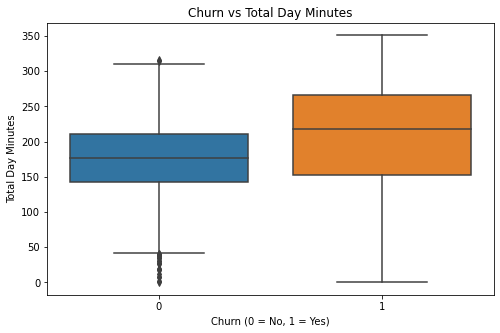

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare churn vs total day minutes
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df)

plt.title('Churn vs Total Day Minutes')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Day Minutes')
plt.show()

*This plot helps visualize how the distribution differs between `churned` and `non-churned` users*

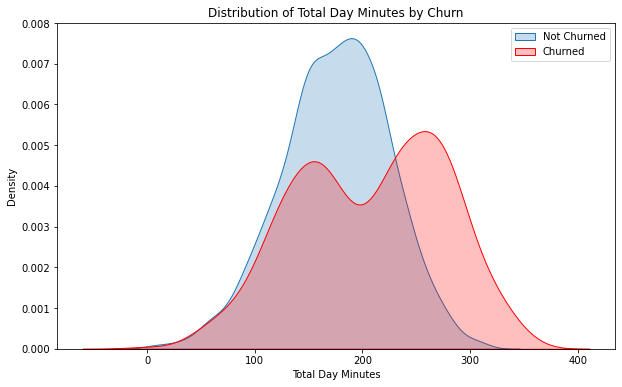

In [56]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['churn'] == 0], x='total day minutes', label='Not Churned', fill=True)
sns.kdeplot(data=df[df['churn'] == 1], x='total day minutes', label='Churned', fill=True, color='red')
plt.title('Distribution of Total Day Minutes by Churn')
plt.xlabel('Total Day Minutes')
plt.legend()
plt.show()

# 📌 Evaluation Summary



- We trained and evaluated three models, that is, Logistic Regression, Decision Tree and Random Forest


- *Random Forest* provided the best performance in terms of accuracy and F1 score.


- *Top Features* contributing to churn include total day minutes, customer service calls and international plan usage.

Random Forest is recommended for deployment if business include high recall and robust prediction

# 🧼 Code Quality Reflection

This notebook follows clean and reusable coding principles:
- Functional structure improves clarity and scalability.
- Evaluation is centralized using `evaluate_model()` function.
- Preprocessing and scaling are handled cleanly with checks for imbalance and category encoding.

Potential improvements:
- Add cross-validation to improve model reliability.
- Wrap the entire pipeline in a class or script for deployment use.
